In [1]:
#Importing necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Loading the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Exploring the dataset
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Unique classes:", np.unique(y_train))


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Unique classes: [0 1 2 3 4 5 6 7 8 9]


The Fashion MNIST dataset is a collection of grayscale images of fashion items, each belonging to one of 10 classes.

Each image is 28x28 pixels, resulting in a total of 784 features per sample.

The dataset is commonly used as a drop-in replacement for the traditional MNIST dataset for benchmarking machine learning algorithms.

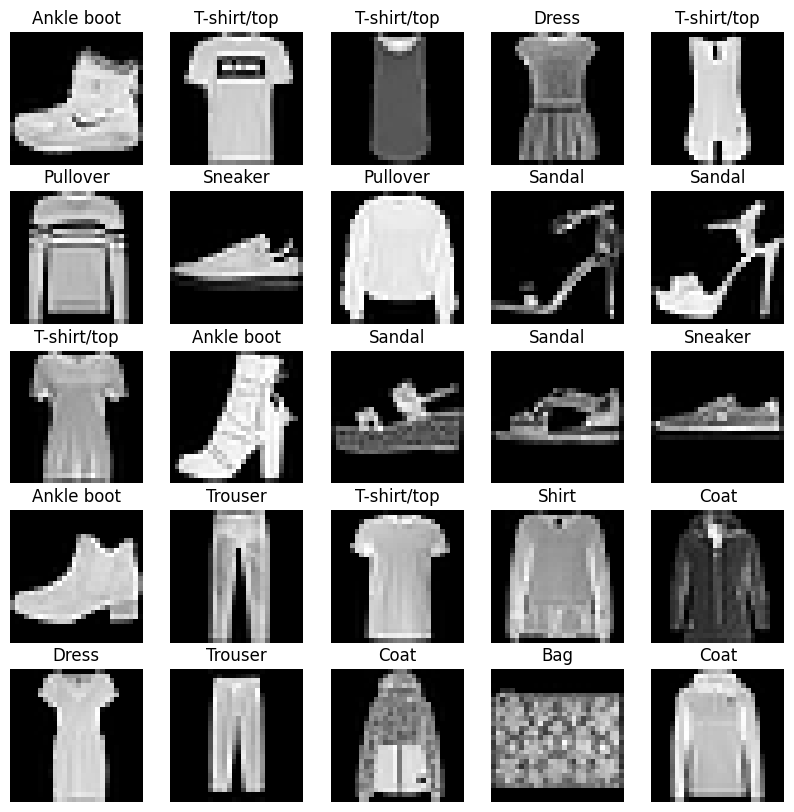

In [2]:
# Visualizing a sample of the dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()


In [3]:
# Displaying class distribution in the training set
class_distribution = np.bincount(y_train)
for i, count in enumerate(class_distribution):
    print(f"Class {i}: {count} samples")


Class 0: 6000 samples
Class 1: 6000 samples
Class 2: 6000 samples
Class 3: 6000 samples
Class 4: 6000 samples
Class 5: 6000 samples
Class 6: 6000 samples
Class 7: 6000 samples
Class 8: 6000 samples
Class 9: 6000 samples


The output shown above indicates that the Fashion MNIST dataset is well-balanced, with each class having an equal number of samples. In this case, there are 6,000 samples for each of the 10 classes. A balanced dataset is desirable for training machine learning models as it helps prevent biases towards certain classes, ensuring that the model learns to generalize well across all classes.

In [4]:
# Normalizing pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Splitting the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


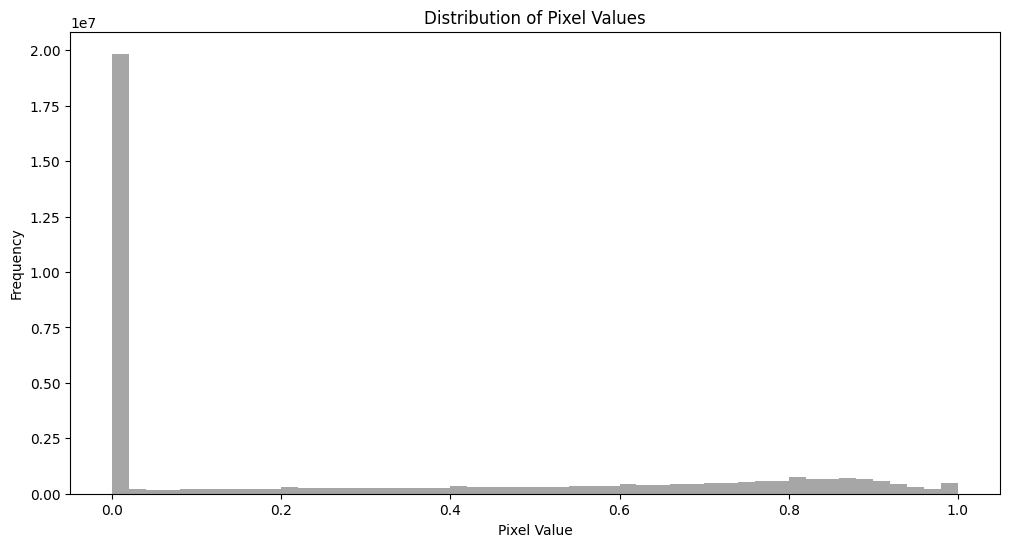

In [5]:
# Visualizing the distribution of pixel values in the dataset
plt.figure(figsize=(12, 6))
plt.hist(x_train.flatten(), bins=50, color='gray', alpha=0.7)
plt.title('Distribution of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()
#

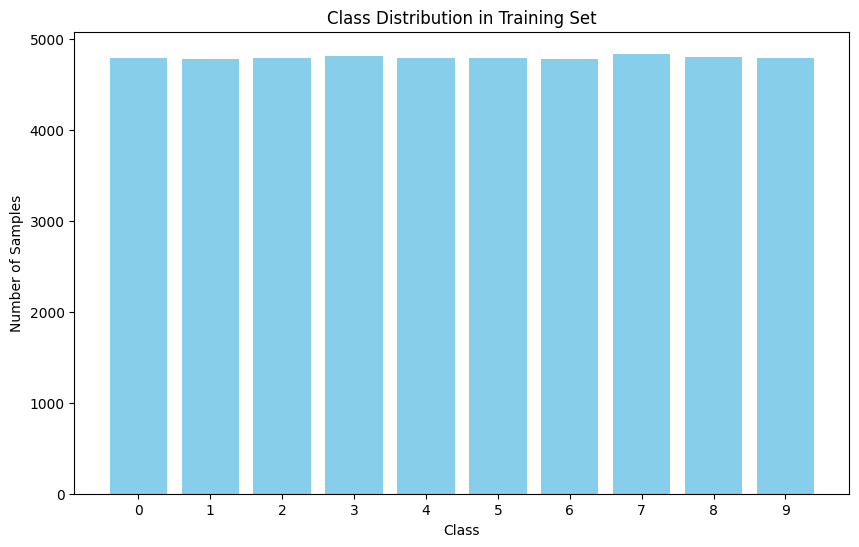

In [6]:
# y_train has been loaded and contains class labels
class_distribution = np.bincount(y_train)

# # Plotting the class distribution in the training set
plt.figure(figsize=(10, 6))
plt.bar(range(10), class_distribution, color='skyblue')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(range(10), [str(i) for i in range(10)])
plt.show()


In [7]:
# Importing necessary components from TensorFlow and Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Defining a function to build a simple neural network model
def build_model(hidden_units=128, activation='relu'):
    # Creating a Sequential model
    model = Sequential([
         # Flattening the 28x28 input images
        Flatten(input_shape=(28, 28)),  
        # Dense layer with specified number of hidden units and activation function
        Dense(hidden_units, activation=activation),
         # Output layer with 10 classes and softmax activation
        Dense(10, activation='softmax')  # Output layer with 10 classes
    ])
    
    # Compiling the model with adam optimizer, sparse_categorical_crossentropy loss function, and metrics
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    #Returning the compiled model
    return model

# Training the model with different hyperparameter configurations
configs = [
    {'hidden_units': 128, 'activation': 'relu'},
    {'hidden_units': 256, 'activation': 'relu'},
    {'hidden_units': 128, 'activation': 'sigmoid'}
]

histories = []
#Loop over Hyperparameter Configurations
for config in configs:
    #For each configuration, a neural network model will be created using the build_model function with the specified hyperparameters.
    model = build_model(hidden_units=config['hidden_units'], activation=config['activation'])
    #Training the Model:
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=0)
    #The training history of the model for the current hyperparameter configuration will be added to the histories list.
    histories.append(history)


In [8]:
# Evaluating models and printing out the results
for i, (config, history) in enumerate(zip(configs, histories)):
    # Extracting the trained model from the training history
    model = history.model
    # Making predictions on the test set
    y_pred = np.argmax(model.predict(x_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Printing the results for the current model configuration
    print(f"\nModel {i + 1} - Configuration:")
    print(f"Hidden Units: {config['hidden_units']}, Activation: {config['activation']}")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(conf_matrix)

313/313 [==============================] - 1s 3ms/step

Model 1 - Configuration:
Hidden Units: 128, Activation: relu
Accuracy: 0.8778
Confusion Matrix:
[[857   1  20  11   1   1 101   0   8   0]
 [  8 965   4  16   3   0   3   0   1   0]
 [ 17   0 858  14  49   0  60   0   2   0]
 [ 45  10  14 875  26   0  25   0   4   1]
 [  1   0 168  38 720   0  68   0   5   0]
 [  0   0   0   0   0 959   0  22   1  18]
 [149   0 103  20  52   1 662   0  13   0]
 [  0   0   0   0   0  20   0 934   0  46]
 [  4   0   4   6   1   5   1   2 977   0]
 [  0   0   0   0   0  11   1  17   0 971]]
313/313 [==============================] - 1s 4ms/step

Model 2 - Configuration:
Hidden Units: 256, Activation: relu
Accuracy: 0.8793
Confusion Matrix:
[[880   0   9  33   5   0  55   1  17   0]
 [  6 945   1  40   2   0   3   0   3   0]
 [ 28   0 780  11  91   0  79   0  11   0]
 [ 24   1  13 911  27   0  16   0   8   0]
 [  2   0  86  40 775   0  86   0  11   0]
 [  0   0   0   1   0 968   0  18   1  12]
 [180  

In [10]:
import warnings
warnings.filterwarnings('ignore')

results = []

# Evaluating models and printing out the results
for i, (config, history) in enumerate(zip(configs, histories)):
    # Using the trained model from the histories list
    model = history.model
    
    # Evaluating on the test set
    y_pred = np.argmax(model.predict(x_test), axis=1)
    
    # Calculating accuracy, confusion matrix, and classification report
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=class_names)
    
     # Collecting results for each configuration
    results.append({
        'config': config,
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report,
        'misclassified_examples': [(i, true, pred) for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]
    })

# Choosing the best configuration
best_result = max(results, key=lambda x: x['accuracy'])

# Reporting results for the best configuration
print("\nBest Configuration:")
print(f"Hidden Units: {best_result['config']['hidden_units']}, Activation: {best_result['config']['activation']}")
print("Accuracy:", best_result['accuracy'])
print("Confusion Matrix:")
print(best_result['confusion_matrix'])
print("Classification Report:")
print(best_result['classification_report'])

# Displaying specific examples of incorrect classification
print("\nExamples of Incorrect Classification:")
for i, true_label, predicted_label in best_result['misclassified_examples'][:5]:
    print(f"Example {i + 1}: True label - {class_names[true_label]}, Predicted label - {class_names[predicted_label]}")

313/313 [==============================] - 1s 3ms/step

Best Configuration:
Hidden Units: 256, Activation: relu
Accuracy: 0.8793
Confusion Matrix:
[[880   0   9  33   5   0  55   1  17   0]
 [  6 945   1  40   2   0   3   0   3   0]
 [ 28   0 780  11  91   0  79   0  11   0]
 [ 24   1  13 911  27   0  16   0   8   0]
 [  2   0  86  40 775   0  86   0  11   0]
 [  0   0   0   1   0 968   0  18   1  12]
 [180   0  75  31  46   0 643   0  25   0]
 [  0   0   0   0   0  14   0 967   0  19]
 [  5   0   0   2   2   2   0   3 986   0]
 [  0   0   0   1   0  10   1  50   0 938]]
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.88      0.83      1000
     Trouser       1.00      0.94      0.97      1000
    Pullover       0.81      0.78      0.79      1000
       Dress       0.85      0.91      0.88      1000
        Coat       0.82      0.78      0.80      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0

The best configuration for the dense neural network was found to have 256 hidden units with the ReLU activation function.

The accuracy achieved with this configuration is approximately 87.93%.

The confusion matrix provides a detailed breakdown of the model's performance across different classes. It shows which classes are often confused with each other. For example, the model tends to confuse shirts with T-shirts/tops and coats with pullovers.

Classes like Trouser, Sandal, Sneaker, Bag, and Ankle boot show high precision and recall, suggesting effective classification.

Classes like Shirt and Pullover have slightly lower precision and recall, indicating more challenges in distinguishing between these classes.

Specific examples of misclassified images are provided. For instance, the model incorrectly classified a sneaker as a sandal, a coat as a pullover, an ankle boot as a sandal, a coat as a pullover, and a shirt as a T-shirt/top. These examples offer a qualitative understanding of the model's challenges.
 
The model performs well, achieving a high accuracy, but there is room for improvement in correctly distinguishing between certain classes. 